## Sampling Strategies

**Reference**

* [An Introduction to Statistical Computing: A Simulation-based Approach, Jochen Voss](https://www.wiley.com/en-us/An+Introduction+to+Statistical+Computing%3A+A+Simulation+based+Approach-p-9781118357729)

We want to look at ways to sample from a distribution. 
In most practical scenarios, the distributions are complex enough that it is difficult enough to sample from appropriately but they can often be evaluated at a certain point. The simple strategy of sampling uniformly fails for a couple of reasons. 

1. This quickly becomes inefficient as the number of dimensions grow.

2. In high-dimensional spaces, there are vast regions of nothingness and most of the probability density is concentrated in a small region. Ideally, we want to sample from regions in space where the function f(x) and the probability of that value f(x) given by p(x) is high so that the contribution of this term \\(f(x) p(x)\\) is high.

We will look at various ways to perform efficient sampling here. This is useful not only to understand how distributions are sampled in practice in a package such as SciPy, but it also helps you to write your own custom distribution should that need arise. 

The techniques listed are mostly applicable to univariate distributions, but they are useful to understand since they form the components in more sophisticated techniques.

### Sampling from Discrete Distributions

#### Uniform Continuous to Uniform Discrete

* In order to sample data from a particular distribution we can start with a uniform continuous distribution between 0 and 1 denoted as U[0,1]. The probability of picking a value less than 'a' that is between 0 and 1 is given by 

$$P(x < a) = a$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; but because there are infinite possibilities between 0 and 1, the probability of picking any particular value 'a' is close to 0.

* If we wanted an arbitrary continuous distribution U[0,k], multiply U[0,1] by k to obtain the scaled distribution

* If we have a discrete uniform distribution from 0 to 'n' denoted as U{0,1,...n-1}, this set has 'n' samples and the probability of choosing any discrete value 'a' is 

$$P(x = a) = \dfrac{1}{n}$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; since this is a discrete value and there are a finite number of elements in  this set. One way to convert this continuous uniform distribution U[0,1] to the &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; discrete distribution U{0,1,...n-1} is through the transformation X = [[n U]] where I have used the notation [[ ]] for rounding the values within to the nearest &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; integer. Now

$$X \sim U \{0,1,...n-1\}$$



#### Arbitrary (Non-uniform) Discrete Distributions

To generate an arbitrary distribution, we can use the continuous uniform distribution and sample from it followed by a transform such that we get our desired distribution. In the figure below, we have divided the uniform continuous distribution U[0,1] into 'n' sections with uneven lengths, given by \\(p_1, p_2, p_3...p_n\\) (here n = 5) such that \\(\sum p_i = 1\\)

![Interval Transformation](transformation.png)

If we want to sample from a arbitrary discrete set \\(A = \{a_1, a_2...a_n\}\\), with probabilities given by \\(p_1, p_2, p_3...p_n\\) all we have to do is sample from the uniform continuous distribution U[0,1] since the interval \\(i\\) will be picked with probability \\(p_i\\) corresponding to the set element \\(a_i\\).


### The Inverse Transform Method

This method uses the Cumulative Distribution Function (CDF) and the inverse of the CDF to generate our desired distribution.

If a variable 'Y' is generated by applying a function 'F' to 'X' we get

$$Y = F(X)$$

which implies that we can apply an inverse transformation to 'Y', if it exists, to obtain 'X'. Here the function  'F' has to be invertible. The function 'F' is said to be bijective and has no jumps in its behavior. 

$$F^{-1} (Y) = X$$

The steps required to generate the new distribution from an existing distribution is shown below.

#### Derivation

If 'y' is a function of 'z', where 

* the PDF of y is given by p(y) and 

* the PDF of z is given by p(z)

$$y = f(z)$$

***We want to determine the function f(z) such that the distribution of values 'y' formed by the transformation \\( y = f(z)\\) is our desired distribution.***

The distribution of 'y' will adhere to the following

$$ p(y) = p(z) \lvert \dfrac{dz}{dy} \rvert$$

If 'z' has a uniform distribution this becomes 

$$p(y) = \lvert \dfrac{dz}{dy} \rvert$$

Integrating both sides, we get

$$z = \int^y_{-\infty} p(y) dy = h(y)$$ 

If you look at the integral, it is simply the CDF of 'y', i.e. h(y) is the CDF of 'y'. If we apply the inverse of the CDF function, i.e. \\(h^{-1}\\), on both sides we get

$y = h^{-1} (z)$

The purpose of this transformation is to express 'y' as a function of 'z'. If we sample from the 'z' distribution, transform the values with the inverse of the CDF of the desired distribution (y), we get the values for 'y' which will have the desired distribution

#### Algorithm

1. Calculate the inverse of the CDF of the desired distribution, given by \\(F^{-1}\\)

2. Sample from 'z' which is U[0,1]

3. Use the sampled values from (2) as input to the inverse of the CDF $F^{-1}$ such that 

    $$Y \sim F^{-1} (U)$$
    
    
The limitation with this approach is that it must be possible to compute the inverse of the CDF of the distribution.    

#### Example

An exponential distribution is given by the PDF

$$p(y) = \lambda e^{-\lambda y}$$ 

if y >= 0

The CDF for this distribution is given by 

$$F = 1 - e^{-\lambda y}$$

but 

$$ F = h(y) = z \longrightarrow z = 1 - e^{-\lambda y} $$

Taking the logarithm on both sides of the equation

$$ y = -log(1 - z) / \lambda $$

Now if you sample from 'z' and plug those values into the equation above, you get values of 'y' which will have the desired distribution.

Text(0.5, 1.0, 'Analytical form of the desired Exponential distribution')

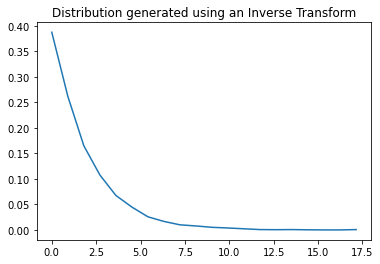

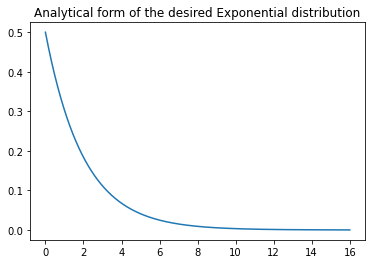

In [2]:
import numpy as np
from scipy.stats import expon
from matplotlib import pyplot as plt

# Generate random numbers
U = np.random.rand(5000)
lam = 0.5
X = -np.log(1 - U)/lam #transformations
hist, bin_edges = np.histogram(X, bins=20, density=True) #histogram of the transformed variables
plt.plot(bin_edges[0:-1], hist) #ideally should center the hist values to be the average of bin edges
plt.title("Distribution generated using an Inverse Transform")
# Get analytical PDF
plt.figure()
x = np.linspace(0, 16, 1000)
Y = expon.pdf(x,0,1/lam)
plt.plot(x, Y)
plt.title("Analytical form of the desired Exponential distribution")

### UNGRADED EVALUATION (30mins)

Generate a Rayleigh distribution using the Inverse Transform Method. The PDF of the Raleigh function f(x) is given by

$f(x) = \dfrac{x}{\sigma^2} e^{-x^2 / 2\sigma^2}$

when $x > 0$ and $\sigma$ is the scale parameter. The CDF for the Rayleigh distribution is given by

$F(x) = 1 - e^{-x^2 / 2\sigma^2}$



### GRADED EVALUATION (15 mins)

1. Most real distributions are difficult to sample from with uniform sampling

    a. True (C)
    
    b. False
    

2. Uniform sampling is inefficient as the number of dimensions grow

    a. True (C)
    
    b. False
    

3. In high-dimensional spaces, most of the mass in the probability density is concentrated in a small region

    a. True (C)
    
    b. False
   
   
4. Ideally we want to sample from regions where the function f(x) and the probability density p(x) is high

    a. True (C)
    
    b. False
   
   
5. The Inverse Transform Method uses 

    a. The inverse of the PDF to generate our desired distribution

    a. the inverse of the CDF to generate our desired distribution (C)

    

### Rejection Sampling

Rejection sampling is more sophisticated than the techniques listed above. It generates approximately the correct distribution, and rejection sampling is used to correct the errors introduced by the approximation resulting in the correct distribution. Rejection sampling is based on the following principles. Suppose that we want to sample from a distribution p(z).

1. A probability density called the proposal density 'q(z)'. This density is selected such that it is easier to sample than the original distribution p(z).

2. p(z) is difficult to sample from but we can evaluate it up to a certain proportionality constant.

3. A constant 'k' such that \\(k q(z) >= p(z)\\) for all values of z. This forms an envelope around p(z) denoted by Q(z, i.e. \\(Q(z) = kq(z)\\)

![Sampling](images/sampling_distribution.png)

Given the above densities, we use the following steps 

1. Draw \\(z_0\\) from \\(q(z)\\) and compute \\(k q(z_0)\\)

2. Draw a uniform number \\(u_0\\) from \\([0, k q(z_0)]\\)

3. If \\(u_0 > p(z_0)\\), the sample is rejected otherwise save \\(u_0\\). By doing so, anything that falls under \\(p(z)\\) is saved and has a uniform distribution thereby obtaining the distribution of p(z) 
       
4. Continue with (1) until sufficient samples have been drawn

The samples are accepted with probability \\(\dfrac{p(z)}{k q(z)}\\). For effective rejection sampling, we want the number of samples that are rejected to a minimum. This is possible only when the envelope distribution is close to the desired distribution. It is also inefficient to use in high dimensional spaces for the following reasons

* The ideal value of k in a 'D' dimensional space is given by \\( (\dfrac{\sigma_q}{\sigma_p})^D\\) where \\(\sigma\\) is the variance of either distribution.

* The acceptance ratio for two normalized distributions \\(p(x)\\) and \\(q(x)\\) is simply \\(1/k\\)

* This acceptance ratio now scales as the ratio \\( (\dfrac{\sigma_p}{\sigma_q})^D\\). If \\( \sigma_q\\) is greater than \\( \sigma_p\\), for D = 1000 the acceptance ratio is close to 1/20000

* In practical scenarios where the distributions are multimodal, this effect is exacerbated.

### Importance Sampling

Importance sampling is useful for computing terms such as the expectations of a function \\(f(x)\\) with distribution \\(p(x)\\). Ideally, we want to sample in space where the product \\(f(x) p(x)\\) is high since the expected value is computed as

$$E[f] = \sum_i p(x_i) f(x_i)$$

Importance sampling is also based on the idea of using another proposal distribution that is easier to sample from compared to the original distribution p(x).

$$E[f] = \int p(x) f(x) dx = \int \dfrac{p(x)}{q(x)} q(x) f(x) dx = \dfrac{1}{L} \sum_l \dfrac{p(x)}{q(x)} f(x) $$ where samples are drawn from q(x) instead of the difficult-to-sample-from distribution p(x).

The \\(\dfrac{p(x)}{q(x)}\\) is known as the importance weights and correct the bias resulting from sampling from the wrong distribution. Unlike rejection sampling, all samples are retained. Similar to rejection sampling, the envelope disribution should be close to the desired distribution for efficient sampling.
      

### GRADED EVALUATION (15 mins)

1. The rejection process in rejection sampling corrects the errors introduced by the approximation

    a. True (C)
    
    b. False
  
  
2. The proposal density is easier to sample than the desired distribution

    a. True (C)
    
    b. False
    
    
3. In rejection sampling, the proposal density 'envelopes' the desired distribution

    a. True (C)
    
    b. False
   
   
4. Importance sampling can be used to compute the expectation of a function f(x)

    a. True (C)
    
    b. False
    
    
5. In importance sampling

    a. Some samples are retained
    
    b. All samples are retained (C)